In [4]:
import numpy as np
import math
import random
import numpy.linalg as la
import matplotlib.pyplot as plt
# Parameters for lattice site
n_sites= 20
n2= 2*n_sites
threshold_e= 1E-6
state_variables=[3.0,3.0,0.0]# nearest neighour hopping # parining term  # chemical potential 
# now we define hamiltonian matrix for our system
def hamiltonin(n_sites,state_variables):
 matrix = np.zeros([n2,n2])
 x= 0.5*(state_variables[0]- state_variables[1])
 y= 0.5*(state_variables[0]+ state_variables[1])
 
 for i in range(n_sites-1):
  matrix[2*i,2*i+1] =x
  matrix[2*i+1,2*i] =-x
  matrix[2*i-1,2*i+2] =-y
  matrix[2*i+2,2*i-1] =y
  matrix[2*i-1,2*i] =state_variables[2]
  matrix[2*i,2*i-1] =-state_variables[2]
 
 matrix[2*(n_sites-1)-1,2*(n_sites-1)]= state_variables[2]
 matrix[2*(n_sites-1),2*(n_sites-1)-1]= -state_variables[2]
 matrix = 1j*matrix
 return matrix


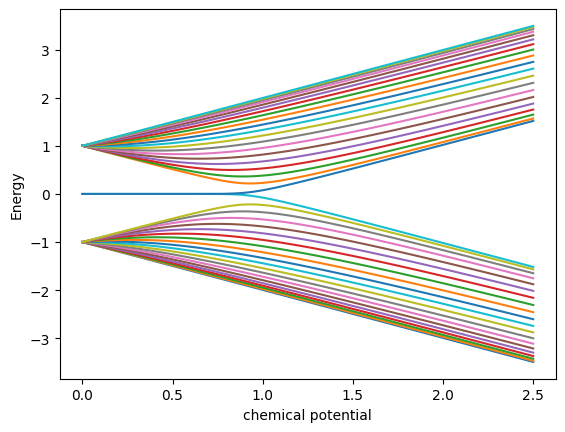

In [5]:


# Calculating energy as function of potential

var_ch= np.linspace(0,2.5,101)
energy= np.zeros([len(var_ch),n2])

for i in range(len(var_ch)):
    energy[i]= la.eigh(hamiltonin(n_sites,state_variables=[1.0,1.0,var_ch[i]]))[0]

for i in range(n2):
 plt.plot(var_ch,energy[:,i])
plt.ylabel('Energy')
plt.xlabel('chemical potential')
plt.show()


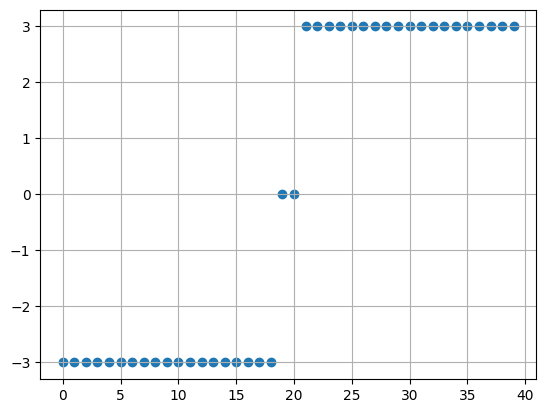

In [6]:

# diagonalisation and zero energy spectrum

def state(matrix):
    eigh_data= la.eigh(matrix)
  #  print(eigh_data[0])
  # print(eigh_data[1])
    plt.scatter(np.arange(len(eigh_data[0].real)),eigh_data[0].real)
    plt.grid()
    plt.show()
state(hamiltonin(n_sites,[3,3,0]))


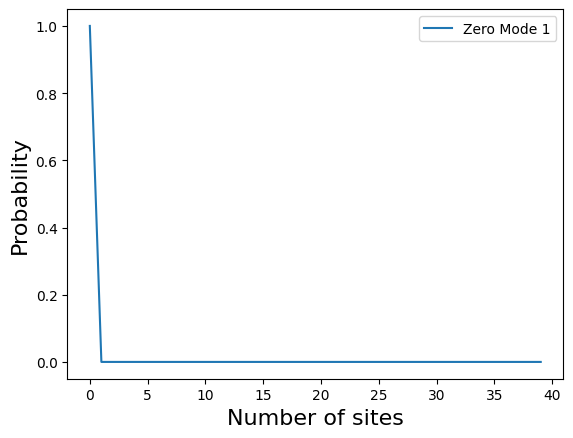

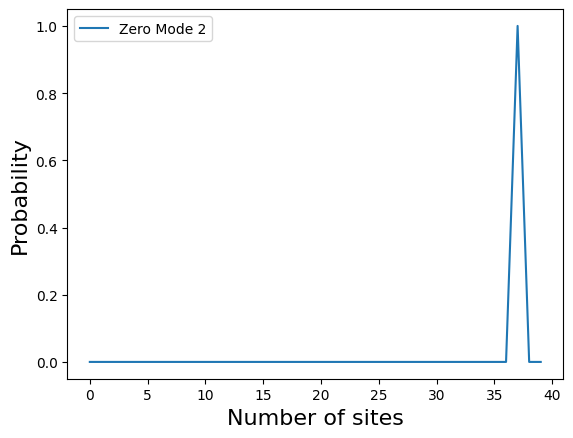

In [7]:

def is_exist(x):
    zero_modes= np.where(abs(x)<= threshold_e)[0]
    return zero_modes,len(zero_modes)

def plot_zero_modes(evals, evecs, params):
    zero_mode_indices, num_zero_modes = is_exist(evals)

    if num_zero_modes > 0:
        for i in range(num_zero_modes):
            zero_mode_index = zero_mode_indices[i]
            plt.plot(np.abs(evecs[:, zero_mode_index]) ** 2, label=f'Zero Mode {i + 1}')
            plt.xlabel('Number of sites', fontsize=16)
            plt.ylabel('Probability', fontsize=16)
            plt.legend()
            plt.show()

x,y= la.eigh(hamiltonin(n_sites,state_variables))
plot_zero_modes(x,y,state_variables)
